In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


Class counts (class names):
leopard      200
cougar       116
flamingo     112
crocodile    107
butterfly     93
kangaroo      86
scorpion      84
llama         78
crab          73
crayfish      72
dragonfly     68
dolphin       65
elephant      64
rhino         59
beaver        46
pigeon        45
lobster       44
octopus       36
Name: count, dtype: int64

New class counts after augmentation (class names):
leopard      200
scorpion     200
llama        200
beaver       200
crayfish     200
crab         200
lobster      200
cougar       200
butterfly    200
dragonfly    200
pigeon       200
flamingo     200
dolphin      200
kangaroo     200
elephant     200
octopus      200
rhino        200
crocodile    200
Name: count, dtype: int64
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733523359.513715    2311 service.cc:145] XLA service 0x7e5e94001fa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733523359.513769    2311 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1733523387.363130    2311 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_23', 16 bytes spill stores, 16 bytes spill loads

I0000 00:00:1733523387.406282    2311 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the

45/45 ━━━━━━━━━━━━━━━━━━━━ 73s 414ms/step - accuracy: 0.1168 - loss: 3.8901 - val_accuracy: 0.0347 - val_loss: 1177.2155 - learning_rate: 0.0010
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 298ms/step - accuracy: 0.2345 - loss: 2.6173 - val_accuracy: 0.0500 - val_loss: 3.7209 - learning_rate: 0.0010
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 297ms/step - accuracy: 0.2641 - loss: 2.3767 - val_accuracy: 0.0694 - val_loss: 3.0509 - learning_rate: 0.0010
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 294ms/step - accuracy: 0.2507 - loss: 2.4410 - val_accuracy: 0.0528 - val_loss: 5.5912 - learning_rate: 0.0010
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 295ms/step - accuracy: 0.3014 - loss: 2.3760 - val_accuracy: 0.0708 - val_loss: 23.4011 - learning_rate: 0.0010
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.3579 - loss: 2.0900
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 295ms/step - accuracy: 0.3578 - loss: 2.0898 - va

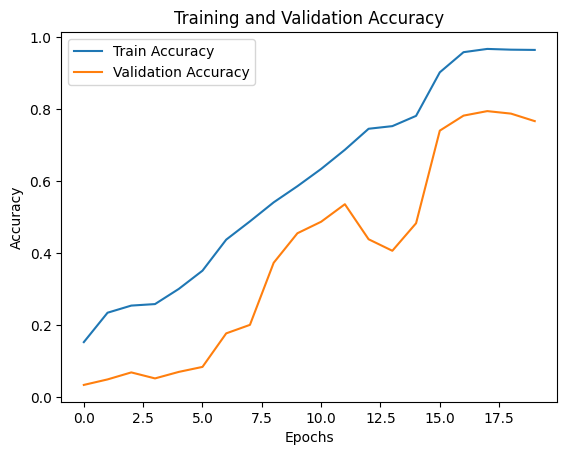

45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9660 - loss: 0.1167
Training accuracy: 96.39%
Model saved successfully.


In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import random
import matplotlib.pyplot as plt
import cv2

# === Step 1: Define Paths ===
image_folder = r"/kaggle/input/animal-kingdom-classification/AnimalTrainData/AnimalTrainData"
csv_path = r"/kaggle/input/animal-kingdom-classification/AnimalTrainData/AnimalTrainData/train.csv"

# === Step 2: Load CSV File ===
df = pd.read_csv(csv_path)

# === Step 3: Create a Mapping of Class Names to Integer Labels ===
class_mapping = {
    "beaver": 0, "butterfly": 1, "cougar": 2, "crab": 3, "crayfish": 4,
    "crocodile": 5, "dolphin": 6, "dragonfly": 7, "elephant": 8, "flamingo": 9,
    "kangaroo": 10, "leopard": 11, "llama": 12, "lobster": 13, "octopus": 14,
    "pigeon": 15, "rhino": 16, "scorpion": 17
}

# === Step 4: Map Image Names to Classes (Integer Labels) ===
image_to_class = dict(zip(df['ImageID'], df['Class']))

def preprocess_image(image_path, target_size=(224, 224)):  # ResNet/Inception requires 224x224 input
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded.")

    image_resized = cv2.resize(image, target_size)
    image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
    image_normalized = image_rgb / 255.0
    return image_normalized

# === Step 5: Load Images and Assign Classes ===
image_data = []
labels = []
for file_name in os.listdir(image_folder):
    if file_name in image_to_class:
        image_path = os.path.join(image_folder, file_name)
        if os.path.isfile(image_path):
            try:
                image_array = preprocess_image(image_path)
                image_data.append(image_array)
                class_name = image_to_class[file_name]
                label = class_mapping.get(class_name, -1)
                if label != -1:
                    labels.append(label)
                else:
                    print(f"Class {class_name} not found in mapping.")
            except (IOError, ValueError) as e:
                print(f"Error reading image {file_name}: {e}")
# Convert to numpy arrays for Keras
image_data = np.array(image_data)
labels = np.array(labels)

# === Step 6: Class Distribution Analysis ===
class_counts = pd.Series(labels).value_counts()
class_names = {v: k for k, v in class_mapping.items()}  # Reverse the mapping
class_counts_named = class_counts.rename(index=class_names)

print("\nClass counts (class names):")
print(class_counts_named)

# === Step 7: Balance Classes to Max Class Size Using Augmentation ===
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

max_class_size = class_counts.max()  # Maximum size among all classes
augmented_images = []
augmented_labels = []

for label in np.unique(labels):
    class_images = image_data[labels == label]
    current_class_size = class_counts[label]

    augmented = datagen.flow(class_images, batch_size=1)
    for _ in range(max_class_size - current_class_size):
        augmented_images.append(next(augmented)[0])
        augmented_labels.append(label)

if augmented_images:  # Ensure there are augmented images to add
    image_data = np.concatenate([image_data, np.array(augmented_images)])
    labels = np.concatenate([labels, np.array(augmented_labels)])

# Check new class distribution
new_class_counts = pd.Series(labels).value_counts()
new_class_counts_named = new_class_counts.rename(index=class_names)

print("\nNew class counts after augmentation (class names):")
print(new_class_counts_named)

# === Step 8: Define ResNet-Like CNN Model ===
def identity_block(input_tensor, kernel_size, filters):
    f1, f2, f3 = filters
    
    # First component of main path
    x = layers.Conv2D(f1, 1, padding='valid')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    
    # Second component of main path
    x = layers.Conv2D(f2, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    
    # Third component of main path
    x = layers.Conv2D(f3, 1, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    
    # Add shortcut connection
    x = layers.Add()([x, input_tensor])
    x = layers.Activation('relu')(x)
    
    return x

def conv_block(input_tensor, kernel_size, filters, strides=(2, 2)):
    f1, f2, f3 = filters
    
    # Shortcut path
    shortcut = layers.Conv2D(f3, 1, strides=strides, padding='valid')(input_tensor)
    shortcut = layers.BatchNormalization()(shortcut)
    
    # Main path
    x = layers.Conv2D(f1, 1, strides=strides, padding='valid')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    
    # Second component of main path
    x = layers.Conv2D(f2, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    
    # Third component of main path
    x = layers.Conv2D(f3, 1, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    
    # Add shortcut connection
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    
    return x
# Input layer
inputs = layers.Input(shape=(224, 224, 3))

# Initial convolution and pooling
x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

# Stage 1 - Residual Blocks
x = conv_block(x, 3, [64, 64, 256], strides=(1, 1))
x = identity_block(x, 3, [64, 64, 256])
x = identity_block(x, 3, [64, 64, 256])

# Stage 2
x = conv_block(x, 3, [128, 128, 512])
x = identity_block(x, 3, [128, 128, 512])
x = identity_block(x, 3, [128, 128, 512])
x = identity_block(x, 3, [128, 128, 512])

# Stage 3
x = conv_block(x, 3, [256, 256, 1024])
x = identity_block(x, 3, [256, 256, 1024])
x = identity_block(x, 3, [256, 256, 1024])
x = identity_block(x, 3, [256, 256, 1024])
x = identity_block(x, 3, [256, 256, 1024])
x = identity_block(x, 3, [256, 256, 1024])

# Stage 4
x = conv_block(x, 3, [512, 512, 2048])
x = identity_block(x, 3, [512, 512, 2048])
x = identity_block(x, 3, [512, 512, 2048])

# Global Average Pooling
x = layers.GlobalAveragePooling2D()(x)

# Fully Connected Output Layer
outputs = layers.Dense(1000, activation='softmax')(x)

# Create the model
model = models.Model(inputs=inputs, outputs=outputs)
# === Step 9: Compile the Model ===
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# === Step 10: Define Callbacks ===
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# === Step 11: Train the Model ===
datagen = ImageDataGenerator(validation_split=0.2)

train_gen = datagen.flow(image_data, labels, batch_size=64, subset='training')
val_gen = datagen.flow(image_data, labels, batch_size=64, subset='validation')

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[early_stopping, lr_scheduler]
)

# === Step 12: Plot Training History ===
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# === Step 13: Evaluate the Model ===
train_loss, train_acc = model.evaluate(train_gen)
print(f"Training accuracy: {train_acc * 100:.2f}%")

model.save("animal_resnet_model.h5")  # Save the model in HDF5 format
print("Model saved successfully.")